<a href="https://colab.research.google.com/github/BragatteMAS/Python/blob/master/How_to/How_to_prophet_yfinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Install yfinance

In [1]:
!pip install yfinance

     |████████████████████████████████| 6.3MB 5.3MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=ed8e8360c16869c98b7cac3c5c4899e51782e03999e2ba61676bc2803f64e841
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


# Forecasting Stocks from Yahoo Finance with Prophet

In [2]:
import yfinance as yf

# berkshire hathaway inc. (b stock)
brk = yf.Ticker('BRK-B')

hist = brk.history(period="max", auto_adjust=True)

hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1996-05-09,22.200001,24.400000,22.200001,23.200001,4290000,0,0.0
1996-05-10,24.000000,24.200001,23.600000,24.000000,1060000,0,0.0
1996-05-13,24.000000,24.100000,23.299999,23.900000,700000,0,0.0
1996-05-14,24.000000,24.100000,23.100000,23.600000,310000,0,0.0
1996-05-15,23.600000,23.700001,23.000000,23.200001,545000,0,0.0
...,...,...,...,...,...,...,...
2021-05-03,278.549988,281.119995,277.670013,279.179993,5184000,0,0.0
2021-05-04,278.540009,280.799988,276.779999,280.260010,4465500,0,0.0
2021-05-05,282.519989,283.500000,282.230011,282.760010,3011100,0,0.0


In [3]:
import pandas as pd

df = pd.DataFrame()

df['ds'] = hist.index
df['y'] = hist['Close'].values

df.tail()

,ds,y
6287,2021-05-03,279.179993
6288,2021-05-04,280.260010
6289,2021-05-05,282.760010
6290,2021-05-06,289.709991
6291,2021-05-07,290.929993


In [4]:
from fbprophet import Prophet

m = Prophet(daily_seasonality=False)

m.fit(df)

In [5]:
future = m.make_future_dataframe(365, freq='D')

forecast = m.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
6650,2022-05-01,257.853127,245.697850,271.208854
6651,2022-05-02,255.075182,242.657181,268.689501
6652,2022-05-03,255.052075,242.455481,269.003801
6653,2022-05-04,254.941954,241.311291,266.601876
6654,2022-05-05,254.810864,241.166794,267.813105
6655,2022-05-06,254.780665,242.090041,267.668890
6656,2022-05-07,257.128153,244.010441,270.474573


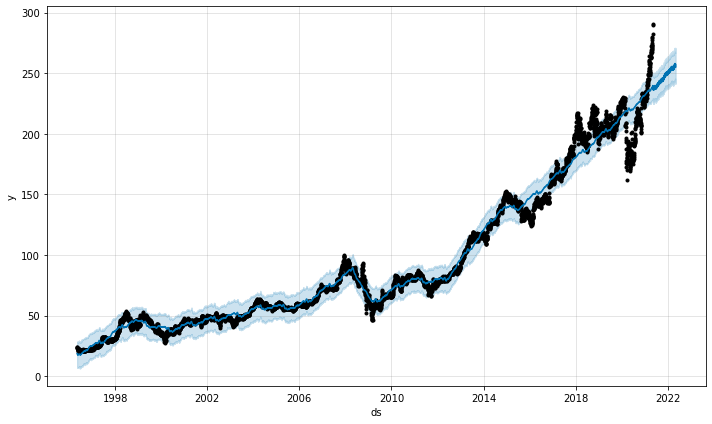

In [6]:
m.plot(forecast);

## Make it a Function

In [8]:
def make_forecast(ticker, periods, hist='max'):
    """
    forecast the given ticker (stock) period days into the future (from today)

    inputs
    ------
    > ticker
        >> ticker of stock to forecast
    > periods
        >> number of days into the future to forecast (from today's date)
    > hist
        >> amount of historical data to consider
            > default: max
            > options: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
    """
    # pull historical data from yahoo finance
    stock_data = yf.Ticker(ticker)

    hist_data = stock_data.history(hist, auto_adjust=True)

    # create new dataframe to hold dates (ds) & adjusted closing prices (y)
    df = pd.DataFrame()

    df['ds'] = hist_data.index.values
    df['y'] = hist_data['Close'].values

    # create a Prophet model from that data
    m = Prophet(daily_seasonality=False)
    m.fit(df)

    future = m.make_future_dataframe(periods, freq='D')

    forecast = m.predict(future)

    m.plot(forecast)

    return forecast

#### Make some Forecasts with that Function

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-05-05,15.231834,14.252027,16.142355,15.231834,15.231834,0.023151,0.023151,0.023151,-0.067223,-0.067223,-0.067223,0.090373,0.090373,0.090373,0.0,0.0,0.0,15.254985
1,2017-05-08,15.229258,14.275403,16.199078,15.229258,15.229258,0.033371,0.033371,0.033371,-0.067181,-0.067181,-0.067181,0.100552,0.100552,0.100552,0.0,0.0,0.0,15.262629
2,2017-05-09,15.228400,14.241208,16.248545,15.228400,15.228400,0.051348,0.051348,0.051348,-0.053952,-0.053952,-0.053952,0.105300,0.105300,0.105300,0.0,0.0,0.0,15.279747
3,2017-05-10,15.227541,14.325859,16.180050,15.227541,15.227541,0.037513,0.037513,0.037513,-0.073017,-0.073017,-0.073017,0.110530,0.110530,0.110530,0.0,0.0,0.0,15.265054
4,2017-05-11,15.226682,14.371722,16.229905,15.226682,15.226682,0.049239,0.049239,0.049239,-0.066881,-0.066881,-0.066881,0.116120,0.116120,0.116120,0.0,0.0,0.0,15.275921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184,2021-10-30,22.471889,21.027354,23.908124,21.439501,23.469271,-0.055973,-0.055973,-0.055973,0.164127,0.164127,0.164127,-0.220100,-0.220100,-0.220100,0.0,0.0,0.0,22.415916
1185,2021-10-31,22.487280,21.138778,23.848050,21.448883,23.498285,-0.061244,-0.061244,-0.061244,0.164127,0.164127,0.164127,-0.225371,-0.225371,-0.225371,0.0,0.0,0.0,22.426036
1186,2021-11-01,22.502672,20.857359,23.676015,21.458266,23.524770,-0.296644,-0.296644,-0.296644,-0.067181,-0.067181,-0.067181,-0.229463,-0.229463,-0.229463,0.0,0.0,0.0,22.206028
1187,2021-11-02,22.518063,20.759988,23.579774,21.467648,23.540517,-0.286338,-0.286338,-0.286338,-0.053952,-0.053952,-0.053952,-0.232385,-0.232385,-0.232385,0.0,0.0,0.0,22.231726


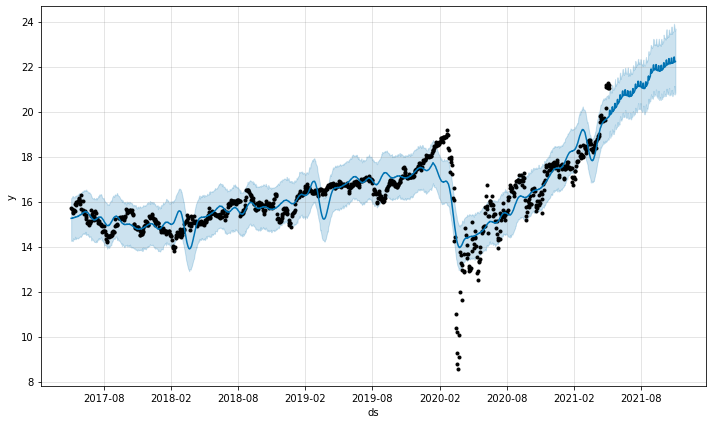

In [9]:
# kkr real estate finance trust
make_forecast('KREF', 180)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2380,2023-05-03,26.565894,4.865293,49.050479,4.099059,46.851346,2.175813,2.175813,2.175813,0.967750,0.967750,0.967750,1.208063,1.208063,1.208063,0.0,0.0,0.0,28.741707
2381,2023-05-04,26.565283,3.196215,50.466463,4.042924,46.894258,2.199464,2.199464,2.199464,1.140098,1.140098,1.140098,1.059366,1.059366,1.059366,0.0,0.0,0.0,28.764747
2382,2023-05-05,26.564671,4.966712,51.235498,3.998368,46.935555,2.064189,2.064189,2.064189,1.180953,1.180953,1.180953,0.883236,0.883236,0.883236,0.0,0.0,0.0,28.628860
2383,2023-05-06,26.564060,-0.023469,46.193717,3.956836,46.962867,-1.981007,-1.981007,-1.981007,-2.662659,-2.662659,-2.662659,0.681651,0.681651,0.681651,0.0,0.0,0.0,24.583053
2384,2023-05-07,26.563448,0.693596,46.466605,3.915304,46.974590,-2.205426,-2.205426,-2.205426,-2.662659,-2.662659,-2.662659,0.457233,0.457233,0.457233,0.0,0.0,0.0,24.358022


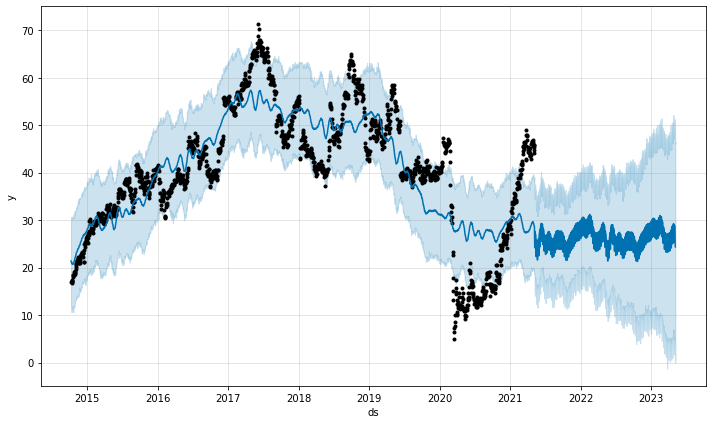

In [10]:
# dave & buster's
make_forecast('PLAY', 365 * 2).tail()

,ds,yhat,yhat_lower,yhat_upper
1054,2021-05-08,65.254423,61.961474,68.324331
1055,2021-05-09,65.334524,62.076204,68.237482
1056,2021-05-10,64.053487,61.035301,67.022077
1057,2021-05-11,64.133763,61.169814,67.008403
1058,2021-05-12,64.262320,60.891778,67.264695
...,...,...,...,...
1414,2022-05-03,114.737504,99.395899,130.408603
1415,2022-05-04,114.813261,99.504372,130.790580
1416,2022-05-05,114.858285,99.257905,131.462599
1417,2022-05-06,115.039032,98.999881,131.048743


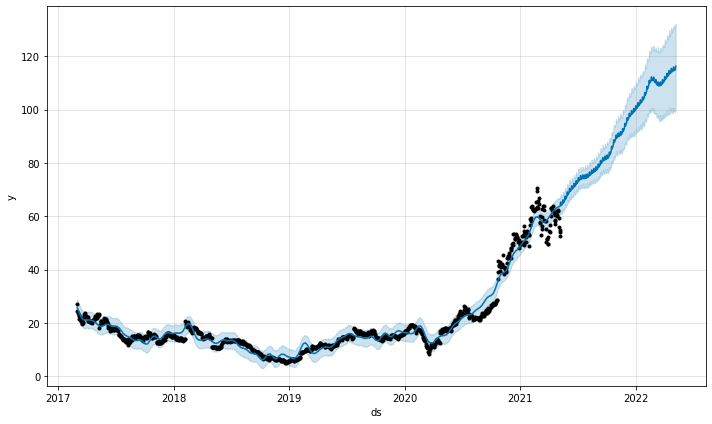

In [11]:
n = 365  # set variable for number of days to predict

# snapchat
snap_forecast = make_forecast('SNAP', n)

# only keep the future forecast, and forget most columns
snap_forecast = snap_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(n)

snap_forecast